# BEATS TDR Chapter 07f_d: flux density @ sample
______________________________________________________

Author:         Gianluca Iori (gianthk.iori@gmail.com)

Created on:   22/02/2020

Last update:  04/04/2020
______________________________________________________


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy as sc
from scipy import constants
from pandas_ods_reader import read_ods
from matplotlib.ticker import ScalarFormatter
import h5py

%precision %.3g

'%.3g'

In [2]:
%matplotlib inline

In [3]:
homedir = '/home/gianthk/Oasys/BEATS/BEATS_BL_Oasys/3PW_plots/'

## White beam flux in 1x1mm^2 @ sample - XOP and Shadow simulations
### (Also with primary slits as secondary source)

In [7]:
# read CSV file with shadow results
names = ['E', 'E0', 'E1', 'I_20', 'FWHM_X', 'FWHM_Z', 'I', 'n']
Flux1mrad_filecsv = '/home/gianthk/Oasys/BEATS/BEATS_BL_Oasys/BEATS_BL_Flux_density_WB.csv'
Flux1mrad = pd.read_csv(Flux1mrad_filecsv, sep=',', names=names, skiprows=[0, 1, 2, 3, 4, 5])
Flux1mrad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 8 columns):
E         36 non-null object
E0        34 non-null object
E1        34 non-null object
I_20      32 non-null object
FWHM_X    34 non-null object
FWHM_Z    34 non-null object
I         32 non-null object
n         32 non-null object
dtypes: object(8)
memory usage: 2.6+ KB


In [6]:
Flux1mrad.head()

,E,E0,E1,I_20,FWHM_X,FWHM_Z,I,n
0,5000,4900,5100,6.29E+03,4000,5000,3.14E+02,5.00E+06
1,10000,9800,10200,1.36E+04,4000,5000,6.78E+02,5.00E+06
2,15000,14700,15300,2.06E+04,4000,5000,1.03E+03,5.00E+06
3,20000,19600,20400,2.73E+04,4000,5000,1.36E+03,5.00E+06
4,25000,24500,25500,3.35E+04,4000,5000,1.68E+03,5.00E+06


In [24]:
float(Flux1mrad['E'][0])

5e+03

In [26]:
# read 3PW flux from XOP
fluxdata = pd.read_csv(homedir+'3PW_flux.csv', sep=',', names=['E', 'F'], skiprows=[0])
F_source = np.array([fluxdata['F'][np.argmin(np.abs(float(Flux1mrad['E'][0])-fluxdata['E']))],
                     fluxdata['F'][np.argmin(np.abs(float(Flux1mrad['E'][1])-fluxdata['E']))],
                     fluxdata['F'][np.argmin(np.abs(float(Flux1mrad['E'][2])-fluxdata['E']))],
                     fluxdata['F'][np.argmin(np.abs(float(Flux1mrad['E'][3])-fluxdata['E']))],
                     fluxdata['F'][np.argmin(np.abs(float(Flux1mrad['E'][4])-fluxdata['E']))],
                     fluxdata['F'][np.argmin(np.abs(float(Flux1mrad['E'][5])-fluxdata['E']))],
                     fluxdata['F'][np.argmin(np.abs(float(Flux1mrad['E'][6])-fluxdata['E']))],
                     fluxdata['F'][np.argmin(np.abs(float(Flux1mrad['E'][7])-fluxdata['E']))],
                     fluxdata['F'][np.argmin(np.abs(float(Flux1mrad['E'][8])-fluxdata['E']))],
                     fluxdata['F'][np.argmin(np.abs(float(Flux1mrad['E'][9])-fluxdata['E']))]])

In [47]:
Flux1mrad['E'][30:40].astype('float')

30     5000.0
31    10000.0
32    15000.0
33    20000.0
34    25000.0
35    30000.0
36    35000.0
37    40000.0
38    45000.0
39    50000.0
Name: E, dtype: float64

In [48]:
# scale flux by intensity through 1mrad aperture @ fix mask or 1 and 0.5 mm @ primary slits
Flux_d_1mrad = F_source*Flux1mrad['I'][0:10].astype('float')/Flux1mrad['n'][0:10].astype('float')
Flux_d_1mm = F_source*Flux1mrad['I'][15:25].astype('float')/Flux1mrad['n'][15:25].astype('float')
Flux_d_05mm = F_source*Flux1mrad['I'][30:40].astype('float')/Flux1mrad['n'][30:40].astype('float')

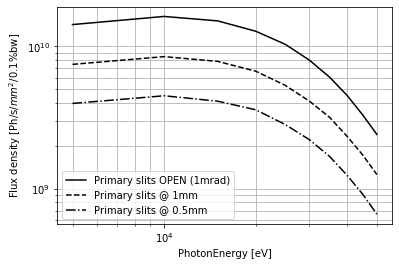

In [61]:
# plot flux in 1mrad Hor. acc.
f, ax = plt.subplots()
plt.plot(Flux1mrad['E'][0:10].astype('float'), Flux_d_1mrad, 'k')
plt.plot(Flux1mrad['E'][0:10].astype('float'), Flux_d_1mm, '--k')
plt.plot(Flux1mrad['E'][0:10].astype('float'), Flux_d_05mm, '-.k')
ax.set_xscale('log')
ax.set_yscale('log')
plt.xlabel('PhotonEnergy [eV]')
plt.ylabel('Flux density [Ph/s/$mm^2$/0.1%bw]')
plt.grid(True, which="both")
plt.legend(['Primary slits OPEN (1mrad)', 'Primary slits @ 1mm', 'Primary slits @ 0.5mm'], loc='lower left')
f.savefig("BEATS_WB_flux_density_primary_slits.png", bbox_inches='tight', dpi=600)

## Flux density @ sample after monochromator - Primary slits OPEN

In [4]:
# read CSV file with shadow results
names = ['E', 'E0', 'E1', 'theta', 'F', 'X', 'Y', 'F_mm2', 'F_mm2_1BW',  'n', 'h', 'BW', '/']
BLflux_filecsv = '/home/gianthk/Oasys/BEATS/BEATS_BL_Oasys/BEATS_BL_Flux_density.csv'
BLfluxdata = pd.read_csv(BLflux_filecsv, sep=',', names=names, skiprows=[0, 1, 2, 3, 4, 5])
# BLfluxdata.info()

In [5]:
BLfluxdata.head()

,E,E0,E1,theta,F,X,Y,F_mm2,F_mm2_1BW,n,h,BW,/
0,5000,4900,5100,2.4470,1.510000e+10,4000,5000,7.530000e+08,2.490000e+08,2000000.0,42.061,3.02,NaN
1,7000,6860,7140,1.7476,5.620000e+11,4000,5000,2.810000e+10,9.100000e+09,2000000.0,30.039,3.09,NaN
2,10000,9800,10200,1.2216,2.150000e+12,4000,5000,1.070000e+11,3.600000e+10,2000000.0,20.998,2.98,NaN
3,11000,10780,11220,1.1104,1.390000e+12,4000,5000,6.960000e+10,2.260000e+10,2000000.0,19.086,3.08,NaN
4,15000,14700,15300,0.8161,2.120000e+12,4000,5000,1.060000e+11,3.360000e+10,2000000.0,14.028,3.15,NaN


#### Flux density @ DMM bw plot

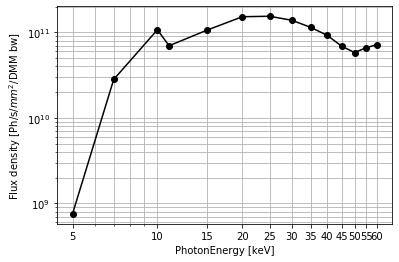

In [43]:
f, ax = plt.subplots()
plt.plot(1e-3*BLfluxdata['E'][:14].astype('float'), BLfluxdata['F_mm2'][:14].astype('float'), '-ok')
ax.set_xscale('log')
ax.set_yscale('log')
plt.xlabel('PhotonEnergy [keV]')
plt.ylabel('Flux density [Ph/s/$mm^2$/DMM bw]')

plt.xticks(np.arange(5, 65, 5))
ax.xaxis.set_major_formatter(ScalarFormatter())
plt.grid(True, which="both")
f.savefig("BEATS_DMM_flux_density.png", bbox_inches='tight', dpi=600)

#### Flux density in 1%BW plot

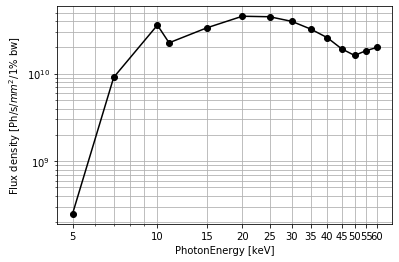

In [42]:
f, ax = plt.subplots()
plt.plot(1e-3*BLfluxdata['E'][:14].astype('float'), BLfluxdata['F_mm2_1BW'][:14].astype('float'), '-ok')
ax.set_xscale('log')
ax.set_yscale('log')
plt.xlabel('PhotonEnergy [keV]')
plt.ylabel('Flux density [Ph/s/$mm^2$/1% bw]')

plt.xticks(np.arange(5, 65, 5))
ax.xaxis.set_major_formatter(ScalarFormatter())
plt.grid(True, which="both")
f.savefig("BEATS_DMM_flux_density_1%BW.png", bbox_inches='tight', dpi=600)

#### Plot of DMM BW vs energy

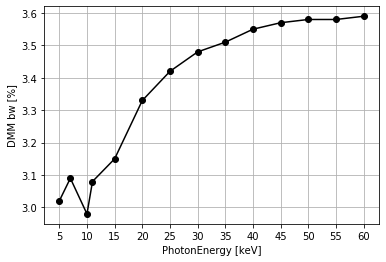

In [45]:
f, ax = plt.subplots()
plt.plot(1e-3*BLfluxdata['E'][:14].astype('float'), BLfluxdata['BW'][:14].astype('float'), '-ok')
plt.xlabel('PhotonEnergy [keV]')
plt.ylabel('DMM bw [%]')
plt.xticks(np.arange(5, 65, 5))
plt.grid(True, which="both")
f.savefig("BEATS_DMM_bw.png", bbox_inches='tight', dpi=600)

#### DMM grazing angle

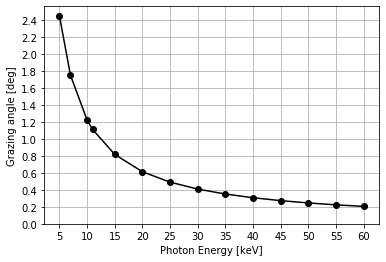

In [17]:
f, ax = plt.subplots()
plt.plot(1e-3*BLfluxdata['E'][:14].astype('float'), BLfluxdata['theta'][:14].astype('float'), '-ok')
plt.xlabel('Photon Energy [keV]')
plt.ylabel('Grazing angle [deg]')
plt.xticks(np.arange(5, 65, 5))
plt.yticks(np.arange(0, 2.6, 0.2))
plt.grid(True, which="both")
f.savefig("BEATS_DMM_grazing_angle.png", bbox_inches='tight', dpi=600)

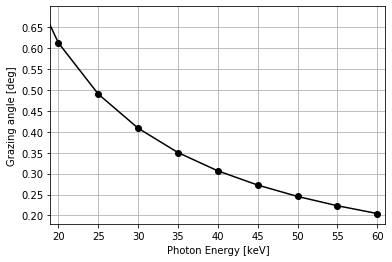

In [18]:
f, ax = plt.subplots()
plt.plot(1e-3*BLfluxdata['E'][:14].astype('float'), BLfluxdata['theta'][:14].astype('float'), '-ok')
plt.xlabel('Photon Energy [keV]')
plt.ylabel('Grazing angle [deg]')
ax.set(xlim=(19, 61), ylim=(0.18, 0.7))
plt.yticks(np.arange(0.2, 0.7, 0.05))
plt.grid(True, which="both")
f.savefig("BEATS_DMM_grazing_angle_zoom.png", bbox_inches='tight', dpi=600)

#### Vertical mirror acceptance

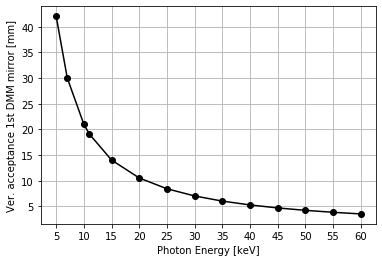

In [26]:
mirror_length = 300 # [mm]

f, ax = plt.subplots()
plt.plot(1e-3*BLfluxdata['E'][:14].astype('float'), 1e-3*mirror_length*(360*BLfluxdata['theta'][:14].astype('float')/(2*np.pi)), '-ok')
plt.xlabel('Photon Energy [keV]')
plt.ylabel('Ver. acceptance 1st DMM mirror [mm]')
plt.xticks(np.arange(5, 65, 5))
plt.grid(True, which="both")
f.savefig("BEATS_DMM_Ver_mirror_acc.png", bbox_inches='tight', dpi=600)

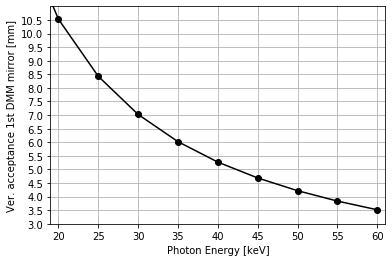

In [31]:
f, ax = plt.subplots()
plt.plot(1e-3*BLfluxdata['E'][:14].astype('float'), 1e-3*mirror_length*(360*BLfluxdata['theta'][:14].astype('float')/(2*np.pi)), '-ok')
plt.xlabel('Photon Energy [keV]')
plt.ylabel('Ver. acceptance 1st DMM mirror [mm]')
ax.set(xlim=(19, 61), ylim=(3, 11))
plt.yticks(np.arange(3, 11, 0.5))
plt.grid(True, which="both")
f.savefig("BEATS_DMM_Ver_mirror_acc_zoom.png", bbox_inches='tight', dpi=600)

## Flux density @ sample after monochromator - Primary slits @ 1mm (Hor.)
This is too demanding for Oasys on my laptop :(
Somebody know how to create a loop in Oasys?